Initial distance: 851.8306513625532
4 6
[[2], [8], [7], [6], [3], [9], [5], [4], [0], [1]]
[[4], [2], [0], [8], [9], [5], [7], [1], [6], [3]]
[[3], [9]]
[[4], [2], [0], [8], [5], [7], [1], [6]]
[[3], [9], [4], [2], [0], [8], [5], [7], [1], [6]]
4 5
[[6], [0], [4], [5], [9], [3], [2], [7], [8], [1]]
[[5], [3], [2], [8], [0], [1], [7], [9], [4], [6]]
[[9]]
[[5], [3], [2], [8], [0], [1], [7], [4], [6]]
[[9], [5], [3], [2], [8], [0], [1], [7], [4], [6]]
4 7
[[2], [5], [7], [1], [0], [9], [4], [6], [8], [3]]
[[4], [2], [3], [8], [1], [9], [0], [7], [5], [6]]
[[0], [9], [4]]
[[2], [3], [8], [1], [7], [5], [6]]
[[0], [9], [4], [2], [3], [8], [1], [7], [5], [6]]
8 9
[[1], [4], [9], [2], [6], [0], [5], [3], [8], [7]]
[[4], [7], [5], [9], [1], [8], [6], [0], [2], [3]]
[[8]]
[[4], [7], [5], [9], [1], [6], [0], [2], [3]]
[[8], [4], [7], [5], [9], [1], [6], [0], [2], [3]]
1 6
[[6], [4], [3], [8], [7], [9], [1], [0], [2], [5]]
[[2], [5], [0], [7], [8], [9], [1], [4], [3], [6]]
[[4], [3], [8], [7], [

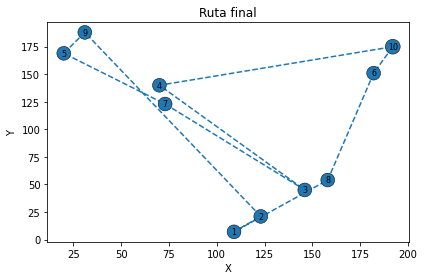

In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

#Creamos la clase ciudad
class Ciudad:
    def __init__(self,id, x, y):
        self.id = id
        self.x = x
        self.y = y
    
    def distancia(self, ciudad):
        xDis = abs(self.x - ciudad.x)
        yDis = abs(self.y - ciudad.y)
        dist = np.sqrt((xDis ** 2) + (yDis ** 2))
        return dist
    
    def __repr__(self):
        return "[" + str(self.id)+ "]"
#cromosoma clase cuyas instancias representan posible soluciones al problema
#de optimizacion
class Cromosoma:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distancia = 0
        self.cromosoma= 0.0
    
    def rutaDistancia(self):
        if self.distancia ==0:
            recorridoDistancia = 0
            for i in range(0, len(self.ruta)):
                fromCity = self.ruta[i]
                toCity = None
                if i + 1 < len(self.ruta):
                    toCity = self.ruta[i + 1]
                else:
                    toCity = self.ruta[0]
                recorridoDistancia += fromCity.distancia(toCity)
            self.distancia = recorridoDistancia
        return self.distancia
    
    def rutaCromosoma(self):
        if self.cromosoma == 0:
            self.cromosoma = 1 / float(self.rutaDistancia())
        return self.cromosoma

#Generador de rutas
def crearRuta(ListaCiudades):
    ruta = random.sample(ListaCiudades, len(ListaCiudades))
    return ruta


#Crear primera "población" (lista de rutas)
#Este método creó una población aleatoria del tamaño especificado.

def initialPopulation(popSize, ListaCiudades):
    population = []

    for i in range(0, popSize):
        population.append(crearRuta(ListaCiudades))
    return population

#Crear el algoritmo genético
#Clasificar individuos
#Esta función toma una población y la ordena en orden descendente usando la aptitud de cada individuo
def clasificar(population):
    cromosomaResults = {}
    for i in range(0,len(population)):
        cromosomaResults[i] = Cromosoma(population[i]).rutaCromosoma()
    sorted_results=sorted(cromosomaResults.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_results



#Cree una función de selección que se usará para hacer la lista de rutas principales

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Cromosoma"])
    df['cum_sum'] = df.Cromosoma.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Cromosoma.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

#Crear piscina de apareamiento

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

#Crear una función de cruce para que dos padres creen un hijo
def cruza(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        

    childP2 = [item for item in parent2 if item not in childP1]
    print(startGene, endGene)

    print(parent1)
    print(parent2)

    print(childP1)
    print(childP2)
    child = childP1 + childP2

    print(child)
    return child

#Crear función para ejecutar el cruce sobre el grupo de acoplamiento completo

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = cruza(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


#Crear función para mutar una sola ruta
def mutacion(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual



#Crear función para ejecutar la mutación en toda la población

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutacion(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop



#Pon todos los pasos juntos para crear la próxima generación

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = clasificar(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

#Paso final: crear el algoritmo genético

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = [1 / clasificar(pop)[0][1]]
    print("Initial distance: " + str(progress[0]))
    
    for i in range(1, generations+1):
        
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / clasificar(pop)[0][1])
        if i%50==0:
          print('Generation '+str(i),"Distancia: ",progress[i])
        
        
    bestRouteIndex = clasificar(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    return bestRoute

#Ejecutando el algoritmo genético

ListaCiudades = []

for i in range(0,10):
    ListaCiudades.append(Ciudad(id = i, x=int(random.random() * 200), y=int(random.random() * 200)))


mejor_ruta = geneticAlgorithm(population=ListaCiudades, popSize=50, eliteSize=20, mutationRate=0.01, generations=1)

x=[]
y=[]

for i in mejor_ruta:
    x.append(i.x)
    y.append(i.y)
    
x.append(mejor_ruta[0].x)
y.append(mejor_ruta[0].y)
plt.plot(x, y, '--o')
plt.xlabel('X')
plt.ylabel('Y')
ax=plt.gca()

plt.title('Ruta final')
bbox_props = dict(boxstyle="circle,pad=0.3", fc='C0', ec="black", lw=0.5)

for i in range(1,len(ListaCiudades)+1):
  ax.text(ListaCiudades[i-1].x, ListaCiudades[i-1].y, str(i), ha="center", va="center",
            size=8,
            bbox=bbox_props)
plt.tight_layout()
plt.show()

